## Guesstimating TESS Cycle 2 coordinates

Because the exact camera coordinates for TESS Cycle 2 are nowhere to be found, we predict them by assuming they will be mirrored across the ecliptic.  This is no doubt wrong, but it's better than nothing!

In [21]:
%matplotlib inline
from astropy.coordinates import SkyCoord
import pandas as pd
import matplotlib.pyplot as pl

In [29]:
# Read the TESS Cycle 1 info
cycle1 = pd.read_csv('tess_cycle_1.dat')

In [30]:
# Loop through each sector and mirror it along the ecliptic
north = []
for idx in range(len(cycle1)):
    sector = cycle1.iloc[idx]
    sector_new = {'Sector': idx+101}
    for camera in [1, 2, 3, 4]:
        crd = SkyCoord(sector[f'Cam{camera}RA'], sector[f'Cam{camera}Dec'], frame='icrs', unit='deg')
        crd_new = SkyCoord(crd.barycentrictrueecliptic.lon, -crd.barycentrictrueecliptic.lat, frame='barycentrictrueecliptic').icrs
        sector_new[f'Cam{camera}RA'] =  crd_new.ra.deg
        sector_new[f'Cam{camera}Dec'] =  crd_new.dec.deg
    north.append(sector_new)

In [31]:
cycle2 = pd.DataFrame(north, columns=north[0].keys())

In [32]:
north_start_dates = ['07/18/19', '08/15/19', '09/11/19', '10/07/19', '11/02/19', '11/27/19', '12/24/19', '01/21/20', '02/18/20', '03/18/20', '04/15/20', '05/13/20', '06/08/20']
north_end_dates = ['08/15/19', '09/11/19', '10/07/19', '11/02/19', '11/27/19', '12/24/19', '01/21/20', '02/18/20', '03/18/20', '04/15/20', '05/13/20', '06/08/20', '07/04/20']
cycle2['Start'] = north_start_dates
cycle2['End'] = north_end_dates

In [33]:
cycle2.to_csv('tess_cycle_2_prediction.dat')

## Sanity check: plot the results

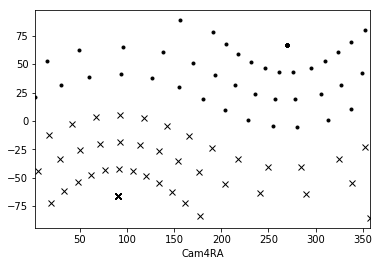

In [34]:
ax = pl.subplot();
for camera in [1, 2, 3, 4]:
    ax = cycle1.plot(x=f'Cam{camera}RA', y=f'Cam{camera}Dec', style='kx', legend=None, ax=ax);
    ax = cycle2.plot(x=f'Cam{camera}RA', y=f'Cam{camera}Dec', style='k.', legend=None, ax=ax);

In [35]:
# Sanity check: according to WTV, Kepler-10 should be in the first two and in the last sector
ra, dec = 285.6794, 50.2413  # Kepler-10
print(cycle2.iloc[0]['Cam3RA'], cycle2.iloc[0]['Cam3Dec'])
print(cycle2.iloc[1]['Cam3RA'], cycle2.iloc[1]['Cam3Dec'])
print(cycle2.iloc[-1]['Cam3RA'], cycle2.iloc[-1]['Cam3Dec'])

295.06723790327567 46.49911857794193
309.65113250676853 52.35728005924541
276.13697378951923 42.79491409557237
